In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
from sqlalchemy import create_engine

In [2]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'pdahal001' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [3]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [4]:
table_name1 = r'feature_cols'
table_name2 = r'target_cols'
schema = r'analytics' # schema were the data was loaded last week.

X_val = pd.read_sql_table(table_name1, db_conn, schema)
y_val = pd.read_sql_table(table_name2, db_conn, schema)

In [5]:
X_val.head()

,temperature,has_children,direction_same,direction_opp,destination_Work,passanger_Partner,weather_Snowy,weather_Sunny,time_10PM,time_2PM,...,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,destination_acceptance_rate,avg_coupon_time,recent_acceptance_trend,weather_temp_impact,income_acceptance_rate
0,0.845791,-0.859296,0.0,0.0,-0.348658,-0.335708,-0.328806,0.460849,-0.423671,1.773234,...,-0.436370,-0.132476,-0.15457,1.048521,-0.438838,0.580604,-1.527661,-1.802445,0.384183,-0.396374
1,-0.486302,-0.859296,0.0,0.0,-0.348658,-0.335708,-0.328806,0.460849,-0.423671,-0.563941,...,2.291634,-0.132476,-0.15457,-0.953724,-0.438838,-1.722343,-0.266948,0.978501,-0.192036,-0.396374
2,-0.486302,-0.859296,0.0,0.0,-0.348658,-0.335708,-0.328806,-2.169906,-0.423671,-0.563941,...,-0.436370,-0.132476,-0.15457,1.048521,-0.438838,0.580604,0.993766,0.515010,-0.192036,-0.396374
3,-0.486302,1.163744,0.0,0.0,-0.348658,-0.335708,-0.328806,0.460849,-0.423671,1.773234,...,-0.436370,-0.132476,-0.15457,-0.953724,-0.438838,0.580604,-1.527661,-0.411972,-0.192036,-0.396374
4,0.845791,-0.859296,0.0,0.0,-0.348658,-0.335708,-0.328806,0.460849,-0.423671,-0.563941,...,-0.436370,-0.132476,-0.15457,-0.953724,2.278743,0.580604,0.993766,-0.875463,0.384183,-0.396374


In [6]:
y_val.head()

,Y
0,0
1,0
2,0
3,1
4,0


In [7]:
# Convert y_val to a 1D array
y_val = y_val.iloc[:, 0]  
y_val = y_val.values.flatten()  # Ensures it's a NumPy 1D array

In [8]:
# Load the saved model
loaded_model = joblib.load("assignment_rf_model.joblib")

Here, we loaded the saved XGBoost model that achieved the highest accuracy in the previous file.

In [9]:
# Generate predictions
y_val_pred = loaded_model.predict(X_val)

In [10]:
# Calculate regression metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

In [11]:
print(f" Mean Absolute Error (MAE): {mse}")
print(f" R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

 Mean Absolute Error (MAE): 0.1906259910157046
 R² Score: 0.2112783415426246
Mean Absolute Error (MAE): 0.3665421663117525


So, finally, we loaded the model and validated it in this file. In the previous file, we evaluated three different features with three different models and selected the XGBoost model from our initial feature list, as it provided the best validation results.

We used the same model here and analyzed its performance. The Mean Absolute Error (MAE) of 0.1906 indicates that, on average, the model's predictions deviate by approximately 0.19 units from the actual values, reflecting a low prediction error. The R² Score of 0.2113 suggests that the model explains about 21.13% of the variance, indicating a relatively weak fit. Additionally, the Mean Absolute Error (MAE) of 0.3665 further highlights the model’s error in absolute terms.

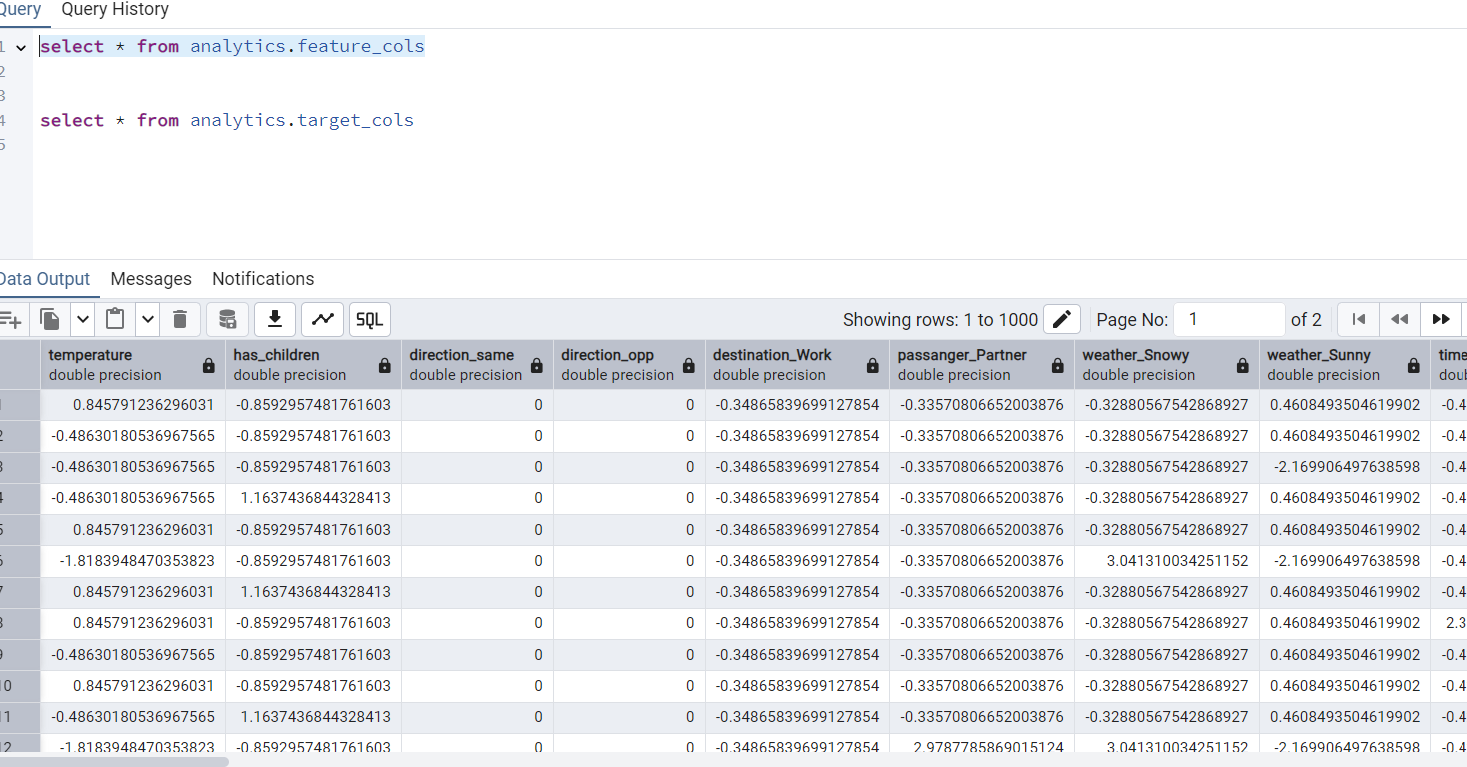

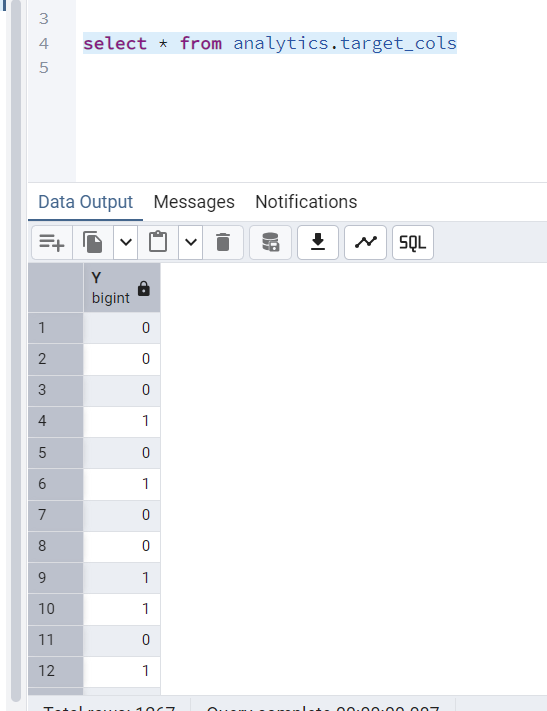